# Table Visualization and Multi-Column Heatmap Rendering with pandas.DataFrame.style and CSS

[The real reason for this notebook](#Visualize_Table)

<div style="font-size:19px"><strong>Hello, pandas tables work like an HTML table, with rows as tr and columns as td. And we can apply CSS properties to them.</strong>
<br><br>
Sometimes, when visualizing data in seaborn, especially when there are a lot of columns, creating a heatmap to see correlations can result in a cluttered and unintelligible display.
<br><br>
Yes, when dealing with large dataframes with numerous features (columns), creating a heatmap can be problematic. The image may be unclear, and setting the annot parameter to True doesn't help.
<br><br>
In such cases, what can I do to visualize the heatmap properly?
<br><br>
<mark style="background-color:darkgreen; color:darkorange">***Additionally, this notebook contains ways to display dataframes with a clearer view using CSS.***</mark></div>

[For brief HTML information, you can look here.](#HTML)

# Import

In [1]:
import pandas as pd
from seaborn import get_dataset_names, load_dataset, heatmap

In [2]:
pd.__version__

'2.2.2'

In [3]:
listDatasets = get_dataset_names()
listDatasets

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

In [4]:
listDatasets = listDatasets[:listDatasets.index("titanic")+1]
listDatasets

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

# Read Data - brain_networks dataset

In [5]:
dfBrainNetworks = load_dataset(listDatasets[3], header=[0, 1, 2], index_col=0)
dfBrainNetworks.head()

network          1                     2                     3             \
node             1                     1                     1              
hemi            lh         rh         lh         rh         lh         rh   
0        56.055744  92.031036   3.391576  38.659683  26.203819 -49.715569   
1        55.547253  43.690075 -65.495987 -13.974523 -28.274963 -39.050129   
2        60.997768  63.438793 -51.108582 -13.561346 -18.842947  -1.214659   
3        18.514868  12.657158 -34.576603 -32.665958  -7.420454  17.119448   
4        -2.527392 -63.104668 -13.814151 -15.837989 -45.216927   3.483550   

network          4                     5             ...         16  \
node             1                     1             ...          3   
hemi            lh         rh         lh         rh  ...         rh   
0        47.461037  26.746613 -35.898861  -1.889181  ...   0.607904   
1        -1.210660 -19.012897  19.568010  15.902983  ...  57.495071   
2       -65.575806 -85.777428  19.247454  37.209419  ...  28.317369   
3       -41.800869 -58.610184  32.896915  11.199619  ...  71.439629   
4       -62.613335 -49.076508  18.396759   3.219077  ...  95.597565   

network                                17                                   \
node             4                      1                     2              
hemi            lh          rh         lh         rh         lh         rh   
0       -70.270546   77.365776 -21.734550   1.028253   7.791784  68.903725   
1       -76.393219  127.261360 -13.035799  46.381824 -15.752450  31.000332   
2         9.063977   45.493263  26.033442  34.212200   1.326110 -22.580757   
3        65.842979  -10.697547  55.297466   4.255006  -2.420144  12.098393   
4        50.960453  -23.197300  43.067562  52.219875  28.232882 -11.719750   

network                                    
node             3                      4  
hemi            lh          rh         lh  
0       -10.520872  120.490463 -39.686432  
1       -39.607521   24.764011 -36.771008  
2        12.985169  -75.027451   6.434262  
3       -15.819172  -37.361431  -4.650954  
4         5.453649    5.169828  87.809135  

[5 rows x 62 columns]

<span style="color:yellow; font-size:17px">Great, we ended up with a dataframe containing 62 features for the example we wanted to do.</span>

In [6]:
dfBrainNetworks.shape

(920, 62)

In [7]:
dfBrainNetworks.columns

MultiIndex([( '1', '1', 'lh'),
            ( '1', '1', 'rh'),
            ( '2', '1', 'lh'),
            ( '2', '1', 'rh'),
            ( '3', '1', 'lh'),
            ( '3', '1', 'rh'),
            ( '4', '1', 'lh'),
            ( '4', '1', 'rh'),
            ( '5', '1', 'lh'),
            ( '5', '1', 'rh'),
            ( '6', '1', 'lh'),
            ( '6', '1', 'rh'),
            ( '6', '2', 'lh'),
            ( '6', '2', 'rh'),
            ( '7', '1', 'lh'),
            ( '7', '1', 'rh'),
            ( '7', '2', 'lh'),
            ( '7', '2', 'rh'),
            ( '7', '3', 'lh'),
            ( '7', '3', 'rh'),
            ( '8', '1', 'lh'),
            ( '8', '1', 'rh'),
            ( '8', '2', 'lh'),
            ( '8', '2', 'rh'),
            ( '8', '3', 'lh'),
            ( '8', '3', 'rh'),
            ( '9', '1', 'lh'),
            ( '9', '1', 'rh'),
            ('10', '1', 'lh'),
            ('10', '1', 'rh'),
            ('11', '1', 'lh'),
            ('11', '1', 'rh'),
        

In [8]:
dfBrainNetworks.index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       910, 911, 912, 913, 914, 915, 916, 917, 918, 919],
      dtype='int64', length=920)

# New Column Name

<ul style="font-size:17px; color:orange; list-style:none">
    <li>I want to bring the columns from level 3 of the multi-index to level 1.</li>
    <li>Although the purpose is to create a heatmap with a lot of columns of data, I still want meaningful column names based on the multi-index.</li>
    <li>So, I'm merging them without disrupting the order and names of the columns.</li>
</ul>

In [9]:
dfBrainNetworks.columns = ["_".join(column) for column in dfBrainNetworks.columns]

In [10]:
dfBrainNetworks.columns

Index(['1_1_lh', '1_1_rh', '2_1_lh', '2_1_rh', '3_1_lh', '3_1_rh', '4_1_lh',
       '4_1_rh', '5_1_lh', '5_1_rh', '6_1_lh', '6_1_rh', '6_2_lh', '6_2_rh',
       '7_1_lh', '7_1_rh', '7_2_lh', '7_2_rh', '7_3_lh', '7_3_rh', '8_1_lh',
       '8_1_rh', '8_2_lh', '8_2_rh', '8_3_lh', '8_3_rh', '9_1_lh', '9_1_rh',
       '10_1_lh', '10_1_rh', '11_1_lh', '11_1_rh', '12_1_lh', '12_1_rh',
       '12_2_lh', '12_2_rh', '12_3_lh', '13_1_lh', '13_1_rh', '13_2_lh',
       '13_2_rh', '13_3_rh', '13_4_rh', '14_1_lh', '14_1_rh', '15_1_lh',
       '15_1_rh', '16_1_lh', '16_1_rh', '16_2_lh', '16_2_rh', '16_3_lh',
       '16_3_rh', '16_4_lh', '16_4_rh', '17_1_lh', '17_1_rh', '17_2_lh',
       '17_2_rh', '17_3_lh', '17_3_rh', '17_4_lh'],
      dtype='object')

In [11]:
dfBrainNetworks.head()

,1_1_lh,1_1_rh,2_1_lh,2_1_rh,3_1_lh,3_1_rh,4_1_lh,4_1_rh,5_1_lh,5_1_rh,...,16_3_rh,16_4_lh,16_4_rh,17_1_lh,17_1_rh,17_2_lh,17_2_rh,17_3_lh,17_3_rh,17_4_lh
0,56.055744,92.031036,3.391576,38.659683,26.203819,-49.715569,47.461037,26.746613,-35.898861,-1.889181,...,0.607904,-70.270546,77.365776,-21.734550,1.028253,7.791784,68.903725,-10.520872,120.490463,-39.686432
1,55.547253,43.690075,-65.495987,-13.974523,-28.274963,-39.050129,-1.210660,-19.012897,19.568010,15.902983,...,57.495071,-76.393219,127.261360,-13.035799,46.381824,-15.752450,31.000332,-39.607521,24.764011,-36.771008
2,60.997768,63.438793,-51.108582,-13.561346,-18.842947,-1.214659,-65.575806,-85.777428,19.247454,37.209419,...,28.317369,9.063977,45.493263,26.033442,34.212200,1.326110,-22.580757,12.985169,-75.027451,6.434262
3,18.514868,12.657158,-34.576603,-32.665958,-7.420454,17.119448,-41.800869,-58.610184,32.896915,11.199619,...,71.439629,65.842979,-10.697547,55.297466,4.255006,-2.420144,12.098393,-15.819172,-37.361431,-4.650954
4,-2.527392,-63.104668,-13.814151,-15.837989,-45.216927,3.483550,-62.613335,-49.076508,18.396759,3.219077,...,95.597565,50.960453,-23.197300,43.067562,52.219875,28.232882,-11.719750,5.453649,5.169828,87.809135


# Let's take a quick look at the data and perform a simple analysis. We can check if there are any NULL values in the dataset.

In [12]:
dfBrainNetworks.isnull().sum().sum()

0

In [13]:
dfBrainNetworks.iloc[:, :20].describe()

,1_1_lh,1_1_rh,2_1_lh,2_1_rh,3_1_lh,3_1_rh,4_1_lh,4_1_rh,5_1_lh,5_1_rh,6_1_lh,6_1_rh,6_2_lh,6_2_rh,7_1_lh,7_1_rh,7_2_lh,7_2_rh,7_3_lh,7_3_rh
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,-0.014230,-0.024642,0.005682,0.020672,0.001268,0.005887,0.004727,0.013127,-0.002234,-0.013988,-0.005341,-0.024974,-0.017122,-0.013176,0.004434,-0.025277,-0.017272,-0.003578,0.004455,-0.015559
std,48.906340,53.389574,39.360122,42.467636,26.011762,32.956647,28.218673,28.596779,34.728464,38.946151,40.766629,36.840590,32.812769,36.139626,36.218606,29.138424,29.469222,37.122633,50.783031,56.192094
min,-228.101303,-203.172806,-122.468544,-113.232346,-84.018044,-101.687218,-122.945335,-103.409569,-104.299438,-104.826241,-103.748665,-110.009911,-114.771820,-118.036880,-152.891388,-101.865547,-99.753410,-117.407974,-221.229996,-154.191895
25%,-28.645570,-33.573225,-26.185023,-29.356626,-15.425041,-18.497177,-17.053843,-15.994055,-24.474397,-25.207906,-24.994578,-25.142997,-20.794888,-24.046947,-23.670866,-18.982838,-20.017917,-23.573220,-32.790453,-39.152743
50%,0.795935,0.167886,-0.376553,-2.223320,-1.405444,-1.585948,-0.165335,-0.669072,-0.444854,-1.368788,-2.186019,-1.071328,0.375175,-0.278508,-1.277185,-0.425692,-0.274893,-1.142965,-0.645428,-2.475517
75%,29.269680,34.075309,23.395318,24.293522,15.110825,16.698766,16.642275,15.147547,23.062621,24.235983,22.208238,22.561368,20.199022,22.745902,21.360183,17.579123,18.313309,21.846955,31.324253,36.912485
max,163.615540,180.641937,188.279419,224.820267,131.839691,159.681137,130.783218,120.194191,117.555420,125.433167,243.687378,162.203918,124.708946,133.272858,135.330246,118.268341,113.576607,153.220795,223.217209,207.470474


In [14]:
dfBrainNetworks.dtypes

1_1_lh     float64
1_1_rh     float64
2_1_lh     float64
2_1_rh     float64
3_1_lh     float64
            ...   
17_2_lh    float64
17_2_rh    float64
17_3_lh    float64
17_3_rh    float64
17_4_lh    float64
Length: 62, dtype: object

In [15]:
sum(dfBrainNetworks.dtypes == "float64") # All columns appear to be of type float64. However, I'm checking this way just to be sure.

62

In [16]:
dfBrainNetworks.duplicated().sum() # In fact, even if there were duplicate data right now, it wouldn't matter. Because I will be interested in the visuality of the data rather than the data.

0

# Let's dive straight into it. Let's start visualizing.

# Seaborn.Heatmap

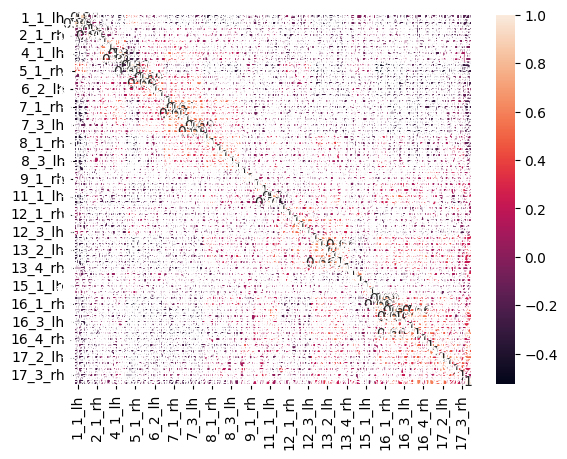

In [17]:
heatmap(dfBrainNetworks.corr(), annot=True);

<strong style="font-size:17px; color:cyan">We can increase the size of the above heatmap. However, it still won't provide a very good visualization. Additionally, when there are more columns, the visualization will continue to be cluttered.</strong>

# Correlation - DataFrame.corr()

### Let's take a look at the data we want to see

In [18]:
dfCorrelationExample = dfBrainNetworks.corr()
dfCorrelationExample

,1_1_lh,1_1_rh,2_1_lh,2_1_rh,3_1_lh,3_1_rh,4_1_lh,4_1_rh,5_1_lh,5_1_rh,...,16_3_rh,16_4_lh,16_4_rh,17_1_lh,17_1_rh,17_2_lh,17_2_rh,17_3_lh,17_3_rh,17_4_lh
1_1_lh,1.000000,0.881516,-0.042699,-0.074437,-0.342849,-0.169498,-0.373050,-0.361726,0.431619,0.418708,...,-0.106642,-0.162254,-0.232501,-0.099781,-0.161649,-0.206379,-0.212601,-0.142770,-0.204326,-0.219283
1_1_rh,0.881516,1.000000,0.013073,0.033733,-0.351509,-0.162006,-0.333244,-0.337476,0.431953,0.519916,...,-0.173530,-0.224436,-0.277954,-0.212964,-0.262915,-0.273370,-0.266456,-0.174222,-0.223572,-0.273626
2_1_lh,-0.042699,0.013073,1.000000,0.813394,-0.006940,-0.039375,-0.019773,0.007099,-0.147374,-0.104164,...,-0.215429,-0.239876,-0.093679,-0.240455,-0.190721,-0.151724,-0.124508,-0.179912,-0.044706,-0.209557
2_1_rh,-0.074437,0.033733,0.813394,1.000000,-0.027324,-0.023608,-0.017577,-0.014632,-0.173501,-0.094717,...,-0.184458,-0.244956,-0.061151,-0.255101,-0.169402,-0.224447,-0.172704,-0.250455,-0.090798,-0.216674
3_1_lh,-0.342849,-0.351509,-0.006940,-0.027324,1.000000,0.553183,0.528787,0.503403,-0.157154,-0.185008,...,-0.146451,-0.033931,-0.156972,-0.015964,-0.149944,0.026579,-0.089109,-0.012675,-0.024644,0.013747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17_2_lh,-0.206379,-0.273370,-0.151724,-0.224447,0.026579,-0.056687,0.020064,0.084837,-0.359879,-0.394522,...,0.173117,0.478606,0.258958,0.499351,0.319184,1.000000,0.597620,0.601382,0.319382,0.517481
17_2_rh,-0.212601,-0.266456,-0.124508,-0.172704,-0.089109,-0.144020,0.007278,0.029909,-0.299152,-0.295150,...,0.299440,0.204444,0.453497,0.272868,0.440901,0.597620,1.000000,0.345253,0.456019,0.256544
17_3_lh,-0.142770,-0.174222,-0.179912,-0.250455,-0.012675,-0.047434,0.070114,0.100063,-0.245179,-0.303354,...,-0.055529,0.259191,0.046663,0.454838,0.188905,0.601382,0.345253,1.000000,0.379705,0.264381
17_3_rh,-0.204326,-0.223572,-0.044706,-0.090798,-0.024644,-0.103875,0.101791,0.128318,-0.302654,-0.277378,...,0.079460,0.005291,0.296318,0.087061,0.224760,0.319382,0.456019,0.379705,1.000000,0.090302


# style property

<span style="font-size:17px"><mark>style</mark> property of DataFrame class in pandas library<span>

In the pandas library, the style property of the DataFrame class holds methods for table visualization. Some of these will be used here

### We can choose one of the colors listed here as a colormap. I will make a list of them. It can be used to experiment with random colors.

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

In [19]:
# I will make a list of them. It can be used to experiment with random colors.
listColor = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']
len(listColor)

178

# style - background_gradient metod

In [20]:
dfCorrelationExample.style.background_gradient("Purples")

,1_1_lh,1_1_rh,2_1_lh,2_1_rh,3_1_lh,3_1_rh,4_1_lh,4_1_rh,5_1_lh,5_1_rh,6_1_lh,6_1_rh,6_2_lh,6_2_rh,7_1_lh,7_1_rh,7_2_lh,7_2_rh,7_3_lh,7_3_rh,8_1_lh,8_1_rh,8_2_lh,8_2_rh,8_3_lh,8_3_rh,9_1_lh,9_1_rh,10_1_lh,10_1_rh,11_1_lh,11_1_rh,12_1_lh,12_1_rh,12_2_lh,12_2_rh,12_3_lh,13_1_lh,13_1_rh,13_2_lh,13_2_rh,13_3_rh,13_4_rh,14_1_lh,14_1_rh,15_1_lh,15_1_rh,16_1_lh,16_1_rh,16_2_lh,16_2_rh,16_3_lh,16_3_rh,16_4_lh,16_4_rh,17_1_lh,17_1_rh,17_2_lh,17_2_rh,17_3_lh,17_3_rh,17_4_lh
1_1_lh,1.000000,0.881516,-0.042699,-0.074437,-0.342849,-0.169498,-0.373050,-0.361726,0.431619,0.418708,-0.084634,-0.031461,-0.077035,-0.037950,-0.333648,-0.288166,-0.366065,-0.325680,-0.196770,-0.144566,-0.366818,-0.388756,-0.352529,-0.363982,-0.341524,-0.350452,-0.071561,-0.051329,-0.122970,-0.083401,-0.383263,-0.317067,-0.049793,0.026902,-0.144335,-0.141253,0.119250,-0.261589,-0.272701,-0.370021,-0.327967,-0.327186,-0.103326,-0.024661,-0.012672,-0.044646,0.008508,-0.269107,-0.237096,-0.196931,-0.183029,-0.300207,-0.106642,-0.162254,-0.232501,-0.099781,-0.161649,-0.206379,-0.212601,-0.142770,-0.204326,-0.219283
1_1_rh,0.881516,1.000000,0.013073,0.033733,-0.351509,-0.162006,-0.333244,-0.337476,0.431953,0.519916,-0.035720,0.036814,-0.049187,-0.001363,-0.284145,-0.247166,-0.361036,-0.274151,-0.142392,-0.070452,-0.358625,-0.402173,-0.302286,-0.339989,-0.315931,-0.343379,-0.112092,-0.057487,-0.137003,-0.106933,-0.398411,-0.334159,-0.112697,-0.036909,-0.144277,-0.189683,0.084633,-0.324230,-0.332886,-0.374322,-0.405959,-0.396053,-0.152463,-0.112679,-0.056383,-0.012046,0.008118,-0.286763,-0.271882,-0.217797,-0.208147,-0.338246,-0.173530,-0.224436,-0.277954,-0.212964,-0.262915,-0.273370,-0.266456,-0.174222,-0.223572,-0.273626
2_1_lh,-0.042699,0.013073,1.000000,0.813394,-0.006940,-0.039375,-0.019773,0.007099,-0.147374,-0.104164,-0.023796,-0.073049,-0.127098,-0.094409,0.030661,0.108992,0.139011,0.081624,-0.029201,-0.021835,0.149822,0.096974,0.030046,0.046601,0.106975,0.074870,-0.204368,-0.188491,-0.078757,-0.121606,0.048997,0.050775,-0.284837,-0.242099,-0.145417,0.021735,-0.164244,-0.158223,-0.150474,-0.139006,-0.210455,-0.132443,-0.086895,-0.184090,-0.065515,-0.015752,0.019047,-0.017265,-0.042815,-0.095501,-0.060235,-0.087376,-0.215429,-0.239876,-0.093679,-0.240455,-0.190721,-0.151724,-0.124508,-0.179912,-0.044706,-0.209557
2_1_rh,-0.074437,0.033733,0.813394,1.000000,-0.027324,-0.023608,-0.017577,-0.014632,-0.173501,-0.094717,-0.066213,-0.108345,-0.170412,-0.046182,0.037597,0.119441,0.128550,0.070068,-0.034760,-0.037368,0.166900,0.123178,0.005026,-0.002802,0.117894,0.105008,-0.193226,-0.134357,-0.045523,-0.076322,0.119976,0.120809,-0.278937,-0.263981,-0.114873,-0.001352,-0.126516,-0.116555,-0.172868,-0.078400,-0.193444,-0.126866,-0.185291,-0.195448,-0.057293,-0.020848,0.037613,-0.019608,-0.030689,-0.059391,-0.033519,-0.040571,-0.184458,-0.244956,-0.061151,-0.255101,-0.169402,-0.224447,-0.172704,-0.250455,-0.090798,-0.216674
3_1_lh,-0.342849,-0.351509,-0.006940,-0.027324,1.000000,0.553183,0.528787,0.503403,-0.157154,-0.185008,0.177515,0.171836,0.237037,0.194157,0.234096,0.316944,0.360712,0.196449,0.071409,0.111786,0.032874,-0.046510,0.057435,0.017854,0.094418,-0.015752,0.018500,-0.070482,0.020065,-0.091292,-0.133667,-0.226548,0.006871,-0.154326,-0.075809,-0.181104,-0.124096,-0.006221,-0.159675,-0.074065,-0.175281,-0.259706,-0.154715,0.104208,-0.035382,-0.040382,-0.132961,-0.016882,-0.081926,-0.083138,-0.166563,0.010310,-0.146451,-0.033931,-0.156972,-0.015964,-0.149944,0.026579,-0.089109,-0.012675,-0.024644,0.013747
3_1_rh,-0.169498,-0.162006,-0.039375,-0.023608,0.553183,1.000000,0.302219,0.354792,-0.101181,-0.095232,0.094462,0.204074,0.160488,0.311982,0.124309,0.287226,0.178005,0.193993,0.008877,0.009078,-0.116502,-0.155786,0.028074,-0.119349,0.006474,-0.094666,-0.037311,-0.131137,0.048486,-0.041439,-0.197208,-0.276649,-0.012899,-0.154084,-0.134092,-0.219954,-0.061237,-0.082012,-0.211583,-0.100924,-0.273650,-0.273157,-0.149883,0.023949,-0.082456,-0.074780,-0.041317,-0.071263,-

# style - set_properties method

<span style="font-size:17px">The text in the table may seem too small. Or it could be big. I want to manually manipulate the table view. I currently prefer to enlarge the texts.<span>

In [21]:
dfCorrelationExample.style.background_gradient(listColor[101]).set_properties(**{"font-size":"17px"})

,1_1_lh,1_1_rh,2_1_lh,2_1_rh,3_1_lh,3_1_rh,4_1_lh,4_1_rh,5_1_lh,5_1_rh,6_1_lh,6_1_rh,6_2_lh,6_2_rh,7_1_lh,7_1_rh,7_2_lh,7_2_rh,7_3_lh,7_3_rh,8_1_lh,8_1_rh,8_2_lh,8_2_rh,8_3_lh,8_3_rh,9_1_lh,9_1_rh,10_1_lh,10_1_rh,11_1_lh,11_1_rh,12_1_lh,12_1_rh,12_2_lh,12_2_rh,12_3_lh,13_1_lh,13_1_rh,13_2_lh,13_2_rh,13_3_rh,13_4_rh,14_1_lh,14_1_rh,15_1_lh,15_1_rh,16_1_lh,16_1_rh,16_2_lh,16_2_rh,16_3_lh,16_3_rh,16_4_lh,16_4_rh,17_1_lh,17_1_rh,17_2_lh,17_2_rh,17_3_lh,17_3_rh,17_4_lh
1_1_lh,1.000000,0.881516,-0.042699,-0.074437,-0.342849,-0.169498,-0.373050,-0.361726,0.431619,0.418708,-0.084634,-0.031461,-0.077035,-0.037950,-0.333648,-0.288166,-0.366065,-0.325680,-0.196770,-0.144566,-0.366818,-0.388756,-0.352529,-0.363982,-0.341524,-0.350452,-0.071561,-0.051329,-0.122970,-0.083401,-0.383263,-0.317067,-0.049793,0.026902,-0.144335,-0.141253,0.119250,-0.261589,-0.272701,-0.370021,-0.327967,-0.327186,-0.103326,-0.024661,-0.012672,-0.044646,0.008508,-0.269107,-0.237096,-0.196931,-0.183029,-0.300207,-0.106642,-0.162254,-0.232501,-0.099781,-0.161649,-0.206379,-0.212601,-0.142770,-0.204326,-0.219283
1_1_rh,0.881516,1.000000,0.013073,0.033733,-0.351509,-0.162006,-0.333244,-0.337476,0.431953,0.519916,-0.035720,0.036814,-0.049187,-0.001363,-0.284145,-0.247166,-0.361036,-0.274151,-0.142392,-0.070452,-0.358625,-0.402173,-0.302286,-0.339989,-0.315931,-0.343379,-0.112092,-0.057487,-0.137003,-0.106933,-0.398411,-0.334159,-0.112697,-0.036909,-0.144277,-0.189683,0.084633,-0.324230,-0.332886,-0.374322,-0.405959,-0.396053,-0.152463,-0.112679,-0.056383,-0.012046,0.008118,-0.286763,-0.271882,-0.217797,-0.208147,-0.338246,-0.173530,-0.224436,-0.277954,-0.212964,-0.262915,-0.273370,-0.266456,-0.174222,-0.223572,-0.273626
2_1_lh,-0.042699,0.013073,1.000000,0.813394,-0.006940,-0.039375,-0.019773,0.007099,-0.147374,-0.104164,-0.023796,-0.073049,-0.127098,-0.094409,0.030661,0.108992,0.139011,0.081624,-0.029201,-0.021835,0.149822,0.096974,0.030046,0.046601,0.106975,0.074870,-0.204368,-0.188491,-0.078757,-0.121606,0.048997,0.050775,-0.284837,-0.242099,-0.145417,0.021735,-0.164244,-0.158223,-0.150474,-0.139006,-0.210455,-0.132443,-0.086895,-0.184090,-0.065515,-0.015752,0.019047,-0.017265,-0.042815,-0.095501,-0.060235,-0.087376,-0.215429,-0.239876,-0.093679,-0.240455,-0.190721,-0.151724,-0.124508,-0.179912,-0.044706,-0.209557
2_1_rh,-0.074437,0.033733,0.813394,1.000000,-0.027324,-0.023608,-0.017577,-0.014632,-0.173501,-0.094717,-0.066213,-0.108345,-0.170412,-0.046182,0.037597,0.119441,0.128550,0.070068,-0.034760,-0.037368,0.166900,0.123178,0.005026,-0.002802,0.117894,0.105008,-0.193226,-0.134357,-0.045523,-0.076322,0.119976,0.120809,-0.278937,-0.263981,-0.114873,-0.001352,-0.126516,-0.116555,-0.172868,-0.078400,-0.193444,-0.126866,-0.185291,-0.195448,-0.057293,-0.020848,0.037613,-0.019608,-0.030689,-0.059391,-0.033519,-0.040571,-0.184458,-0.244956,-0.061151,-0.255101,-0.169402,-0.224447,-0.172704,-0.250455,-0.090798,-0.216674
3_1_lh,-0.342849,-0.351509,-0.006940,-0.027324,1.000000,0.553183,0.528787,0.503403,-0.157154,-0.185008,0.177515,0.171836,0.237037,0.194157,0.234096,0.316944,0.360712,0.196449,0.071409,0.111786,0.032874,-0.046510,0.057435,0.017854,0.094418,-0.015752,0.018500,-0.070482,0.020065,-0.091292,-0.133667,-0.226548,0.006871,-0.154326,-0.075809,-0.181104,-0.124096,-0.006221,-0.159675,-0.074065,-0.175281,-0.259706,-0.154715,0.104208,-0.035382,-0.040382,-0.132961,-0.016882,-0.081926,-0.083138,-0.166563,0.010310,-0.146451,-0.033931,-0.156972,-0.015964,-0.149944,0.026579,-0.089109,-0.012675,-0.024644,0.013747
3_1_rh,-0.169498,-0.162006,-0.039375,-0.023608,0.553183,1.000000,0.302219,0.354792,-0.101181,-0.095232,0.094462,0.204074,0.160488,0.311982,0.124309,0.287226,0.178005,0.193993,0.008877,0.009078,-0.116502,-0.155786,0.028074,-0.119349,0.006474,-0.094666,-0.037311,-0.131137,0.048486,-0.041439,-0.197208,-0.276649,-0.012899,-0.154084,-0.134092,-0.219954,-0.061237,-0.082012,-0.211583,-0.100924,-0.273650,-0.273157,-0.149883,0.023949,-0.082456,-0.074780,-0.041317,-0.071263,-

- The set_properties method can be used with different parameters and arguments. Or it can be used as CSS properties and values in a dictinary, as I did here.

- I used the font-size feature here and since there was a hyphen(-) sign in between, I preferred to use it this way.

- Example of other usage; It can be `set_properties(color="green")`

In [22]:
# Here is a small example of this
dfCorrelationExample.iloc[:5, :5].style.set_properties(color="darkgreen", **{"font-size":"17px", "background-color":"darkorange"})

,1_1_lh,1_1_rh,2_1_lh,2_1_rh,3_1_lh
1_1_lh,1.000000,0.881516,-0.042699,-0.074437,-0.342849
1_1_rh,0.881516,1.000000,0.013073,0.033733,-0.351509
2_1_lh,-0.042699,0.013073,1.000000,0.813394,-0.006940
2_1_rh,-0.074437,0.033733,0.813394,1.000000,-0.027324
3_1_lh,-0.342849,-0.351509,-0.006940,-0.027324,1.000000


# Multicollinearity Detection

<div style="color:Green; font-size:17px">I have a lot of columns and I can view them, nice.

But searching in such a large area or larger area to detect multicollinearity is tedious and troublesome.

***I want to make a setting for this.***</div>

In [23]:
# There seem to be no columns in this dataset that have very high correlations with each other. That's why I focus on medium and low correlations. Because the purpose of the image below is to create a table that will highlight the correlations. If we were in a real study, I would look at values above .89, but here I will look at values higher than 0.59 to get the visual, because there are no values above 0.89.
multiCollThresh = .59  # > .89
print("Full Correlation Shape : ", dfCorrelationExample.shape)
dfMultiCorr = dfCorrelationExample.loc[((abs(dfCorrelationExample) > multiCollThresh) & (abs(dfCorrelationExample) < 1)).any(axis=1), ((abs(dfCorrelationExample) > multiCollThresh) & (abs(dfCorrelationExample) < 1)).any()]
print("Multicollinearity Shape", dfMultiCorr.shape)

Full Correlation Shape :  (62, 62)
Multicollinearity Shape (38, 38)


# The real reason for this notebook

<div style="font-size:17px; font-weight:bold; color:#779977; background-color:#331133cc">
<br><br>
Now here are a few more methods I use.
<br><br>
I use the precision parameter of the **format** method. This parameter can be thought of as the round() method. I want to make the float values in the DataFrame shorter so that the table does not become unnecessarily long. The last 2 values will be enough for us anyway.
<br><br>
I used the **map** method to change the style according to certain conditions. (CAUTION: Depending on your pandas version, you may need to use applymap instead of map method. IF THE map METHOD GIVES AN ERROR, YOU SHOULD USE applymap)
<br><br>
The **set_table_styles** method is used to determine the properties of elements according to certain CSS Selectors. It takes a dictinary array as argument. We need to specify the **selector** and **props**(properties) keys of each dictinary. The value of the **Selector** key must be CSS Selector (such as "td" "th" or "tr" The value of the "props" key must be properties (such as "color: green" "font: Arial 17px" "border:1" There are 2 options for specifying these values. The first is to export the tuple as an array. The second is to give it as a strin. I used both uses within the "set_table_styles" method as an example.
<br><br>
And
<br>
I used the "set_tooltips" method. This is a very useful and enjoyable method on large tables. It has 3 parameters.
<br>
- The 1st parameter is another DataFrame that will correspond to the values in our main table and must have the same rows and columns.
<br>
- The 2nd parameter takes arguments similar to the props key in the **set_table_styles** method.
<br>
- The 3rd parameter again receives arguments similar to the selector key in the "set_table_styles" method, but the tooltip works fine without using it. There may be other ways to use this parameter and I don't know exactly, I didn't use it (I didn't see the need for the action I'm going to do here anyway).

</div>

# Visualize_Table

<h1 style="color:green">set_table_styles method</h1>

<h1 style="color:green">map method</h1>

<br>
<div style="font-size:17px; color:red">

Depending on your pandas version, you may need to use "applymap" instead of "map" method. The "applymap" method has been removed in the latest version.

</div>
<br>
<div style="color:cyan; font-size:17px">

I want to show it without the tooltip in the cell below.
<br>
In the next cell I use the set_tooltips method. When you hover over the Table, it will allow you to get row and column information. In this way, we will be able to more easily see which features the values in the middle regions belong to in large tables.

</div>

I complicated it a bit by using a few colors I liked. You may want to reduce clutter by using the **background_gradient** method. I will write an example of this before moving on to highlighting methods with the new dataset.

In [24]:
dfMultiCorr.style.format(precision=2).set_properties(color="#00cc00", **{"background-color":"#00ff00"}).map(lambda v: "font-size:25px; color:green;" if abs(v) > multiCollThresh and abs(v) < 1 else "background-color:#370073").set_table_styles([{"selector":"td, th", "props":"width: 50px;height:50px;padding:10px;text-align:center"}, {"selector":"th[id*='col']", "props":"transform:rotate(-90deg); height:79px"}, {"selector":"td:hover", "props":[("color", "#9c337f"), ("font-size", "23px"), ("font-weight", "bold")]}, {"selector":"th:hover", "props":[("color", "#9c337f"), ("font-weight", "bold")]}])

,1_1_lh,1_1_rh,2_1_lh,2_1_rh,4_1_lh,4_1_rh,5_1_lh,5_1_rh,6_1_lh,6_1_rh,7_1_lh,7_1_rh,7_2_lh,7_2_rh,7_3_lh,7_3_rh,8_1_lh,8_1_rh,8_2_lh,8_2_rh,11_1_lh,11_1_rh,12_2_lh,13_1_lh,13_1_rh,13_2_lh,13_2_rh,13_3_rh,16_1_lh,16_1_rh,16_2_lh,16_2_rh,16_3_rh,16_4_lh,17_2_lh,17_2_rh,17_3_lh,17_4_lh
1_1_lh,1.00,0.88,-0.04,-0.07,-0.37,-0.36,0.43,0.42,-0.08,-0.03,-0.33,-0.29,-0.37,-0.33,-0.20,-0.14,-0.37,-0.39,-0.35,-0.36,-0.38,-0.32,-0.14,-0.26,-0.27,-0.37,-0.33,-0.33,-0.27,-0.24,-0.20,-0.18,-0.11,-0.16,-0.21,-0.21,-0.14,-0.22
1_1_rh,0.88,1.00,0.01,0.03,-0.33,-0.34,0.43,0.52,-0.04,0.04,-0.28,-0.25,-0.36,-0.27,-0.14,-0.07,-0.36,-0.40,-0.30,-0.34,-0.40,-0.33,-0.14,-0.32,-0.33,-0.37,-0.41,-0.40,-0.29,-0.27,-0.22,-0.21,-0.17,-0.22,-0.27,-0.27,-0.17,-0.27
2_1_lh,-0.04,0.01,1.00,0.81,-0.02,0.01,-0.15,-0.10,-0.02,-0.07,0.03,0.11,0.14,0.08,-0.03,-0.02,0.15,0.10,0.03,0.05,0.05,0.05,-0.15,-0.16,-0.15,-0.14,-0.21,-0.13,-0.02,-0.04,-0.10,-0.06,-0.22,-0.24,-0.15,-0.12,-0.18,-0.21
2_1_rh,-0.07,0.03,0.81,1.00,-0.02,-0.01,-0.17,-0.09,-0.07,-0.11,0.04,0.12,0.13,0.07,-0.03,-0.04,0.17,0.12,0.01,-0.00,0.12,0.12,-0.11,-0.12,-0.17,-0.08,-0.19,-0.13,-0.02,-0.03,-0.06,-0.03,-0.18,-0.24,-0.22,-0.17,-0.25,-0.22
4_1_lh,-0.37,-0.33,-0.02,-0.02,1.00,0.81,-0.22,-0.25,0.18,0.11,0.50,0.39,0.41,0.37,0.27,0.25,0.06,0.04,0.25,0.21,-0.12,-0.17,-0.08,-0.03,-0.11,-0.01,-0.07,-0.15,0.06,0.04,-0.15,-0.18,-0.22,-0.15,0.02,0.01,0.07,-0.07
4_1_rh,-0.36,-0.34,0.01,-0.01,0.81,1.00,-0.24,-0.27,0.13,0.07,0.39,0.34,0.36,0.38,0.14,0.19,-0.03,-0.04,0.20,0.16,-0.11,-0.20,-0.11,-0.03,-0.11,-0.02,-0.09,-0.13,0.05,0.02,-0.09,-0.16,-0.18,-0.07,0.08,0.03,0.10,-0.03
5_1_lh,0.43,0.43,-0.15,-0.17,-0.22,-0.24,1.00,0.82,0.28,0.37,-0.22,-0.08,-0.17,-0.19,-0.01,0.05,-0.36,-0.33,-0.25,-0.24,-0.34,-0.28,0.11,-0.38,-0.33,-0.35,-0.29,-0.28,-0.52,-0.45,-0.39,-0.40,-0.18,-0.25,-0.36,-0.30,-0.25,-0.28
5_1_rh,0.42,0.52,-0.10,-0.09,-0.25,-0.27,0.82,1.00,0.23,0.44,-0.25,-0.08,-0.21,-0.17,-0.04,0.10,-0.38,-0.32,-0.28,-0.27,-0.32,-0.23,-0.01,-0.45,-0.38,-0.42,-0.33,-0.34,-0.53,-0.44,-0.37,-0.32,-0.12,-0.27,-0.39,-0.30,-0.30,-0.28
6_1_lh,-0.08,-0.04,-0.02,-0.07,0.18,0.13,0.28,0.23,1.00,0.69,0.23,0.25,0.22,0.25,0.37,0.40,-0.03,-0.04,0.04,0.09,-0.15,-0.22,0.13,-0.16,-0.19,-0.11,-0.18,-0.15,-0.22,-0.19,-0.27,-0.35,-0.27,-0.24,-0.08,-0.07,-0.08,-0.14
6_1_rh,-0.03,0.04,-0.07,-0.11,0.11,0.07,0.37,0.44,0.69,1.00,0.15,0.35,0.21,0.30,0.38,0.53,-0.05,-0.04,0.01,0.02,-0.17,-0.20,0.04,-0.30,-0.28,-0.23,-0.26,-0.21,-0.34,-0.30,-0.35,-0.37,-0.24,-0.30,-0.19,-0.17,-0.21,-0.23


# set_tooltips methods

<div style="font-size:17px; color:#cccc33">

I am preparing a separate DataFrame to use for tooltip purposes.
<br><br>
A column with a high correlation value may be right in the middle of the table.
<br><br>
Which features does this value belong to?
<br><br>
Do I have to scroll up or to the right again to see this?
<br><br>
Tooltip will give us row and column information.

</div>

In [25]:
listRowsCols = list()
for row in dfCorrelationExample.columns:
    listRC = list()
    for col in dfCorrelationExample.columns:
        listRC.append(f"row: {row} │-│ col: {col}")
    listRowsCols.append(listRC)
dfRowColTooltip = pd.DataFrame(listRowsCols, dfCorrelationExample.columns, dfCorrelationExample.columns)

**I complicated it a bit by using a few colors I liked. You may want to reduce clutter by using the **background_gradient** method. I wrote an example of this before moving on to highlighting methods with the new dataset.**

In [26]:
dfMultiCorr.style.format(precision=2).set_properties(color="#00cc00", **{"background-color":"#00ff00"}).map(lambda v: "font-size:25px; color:green;" if abs(v) > multiCollThresh and abs(v) < 1 else "background-color:#370073").set_table_styles([{"selector":"td, th", "props":"width: 50px;height:50px;padding:10px;text-align:center"}, {"selector":"th[id*='col']", "props":"transform:rotate(-90deg); height:79px"}, {"selector":"td:hover", "props":[("color", "#9c337f"), ("font-size", "23px"), ("font-weight", "bold")]}, {"selector":"th:hover", "props":[("color", "#9c337f"), ("font-weight", "bold")]}]).set_tooltips(dfRowColTooltip, "font-size:19px; width:300px; height:30px; padding:5px; color:#331199; background-color:#9c337fcc; margin-top:-3%; resize: both; text-align:center; visibility:hidden; position:absolute; z-index:1")

# set_tooltips with **background_gradient**

In [27]:
dfMultiCorr.style.background_gradient(listColor[177]).set_tooltips(dfRowColTooltip, "font-size:19px; width:300px; height:30px; padding:5px; color:#111177; background-color:#9c337fdd; margin-top:-3%; resize: both; text-align:center; visibility:hidden; position:absolute; z-index:1").set_table_styles([{"selector":"td, th", "props":"width: 50px;height:50px;padding:10px;text-align:center"}])

# highlighting methods

<span style="font-size:17px; color:yellow">Let's look at a few more methods. I will use a small dataframe for this<span>

# Read Data - anagrams dataset

In [28]:
dfAnagrams = load_dataset(listDatasets[0], index_col=0)
dfAnagrams

,attnr,num1,num2,num3
subidr,,,,
1,divided,2,4.0,7
2,divided,3,4.0,5
3,divided,3,5.0,6
4,divided,5,7.0,5
5,divided,4,5.0,8
6,divided,5,5.0,6
7,divided,5,4.5,6
8,divided,5,7.0,8
9,divided,2,3.0,7


***I set a value to NULL. There is no NULL value in the Dataset but it is required for visualization***

In [29]:
dfAnagrams.shape

(20, 4)

In [30]:
dfAnagrams.isnull().sum()

attnr    0
num1     0
num2     0
num3     0
dtype: int64

In [31]:
dfAnagrams.iloc[1,1] = None
dfAnagrams.iloc[3,2] = None
dfAnagrams.isnull().sum()

attnr    0
num1     1
num2     1
num3     0
dtype: int64

In [32]:
dfAnagrams.head()

,attnr,num1,num2,num3
subidr,,,,
1,divided,2.0,4.0,7
2,divided,NaN,4.0,5
3,divided,3.0,5.0,6
4,divided,5.0,NaN,5
5,divided,4.0,5.0,8


# highlight_null method

In [33]:
dfAnagrams.head().style.highlight_null()

,attnr,num1,num2,num3
subidr,,,,
1,divided,2.000000,4.000000,7
2,divided,nan,4.000000,5
3,divided,3.000000,5.000000,6
4,divided,5.000000,nan,5
5,divided,4.000000,5.000000,8


In [34]:
dfAnagrams.head().style.highlight_null("darkred")

,attnr,num1,num2,num3
subidr,,,,
1,divided,2.000000,4.000000,7
2,divided,nan,4.000000,5
3,divided,3.000000,5.000000,6
4,divided,5.000000,nan,5
5,divided,4.000000,5.000000,8


# highlight_max and highlight_min methods

**We choose numeric columns because they highlight max and min values in numeric values.**

In [35]:
# axis = 0
dfAnagrams.select_dtypes("number").style.highlight_max(color="green")

,num1,num2,num3
subidr,,,
1,2.000000,4.000000,7
2,nan,4.000000,5
3,3.000000,5.000000,6
4,5.000000,nan,5
5,4.000000,5.000000,8
6,5.000000,5.000000,6
7,5.000000,4.500000,6
8,5.000000,7.000000,8
9,2.000000,3.000000,7


### axis parameter

- The default value of the axis parameter is 0.
- It shows the highest(**highlight_max**) or lowest(**highlight_min**) values of each column.

- If axis=1 is set, it will show the highest (or lowest) values of each row.
 
- If axis=None is set, it will show the highest (or lowest) value in the entire table.

- If there is more than one highest (or lowest) value, it marks all of them.

In [36]:
# axis = 1
dfAnagrams.select_dtypes("number").style.highlight_max(color="green", axis=1)

,num1,num2,num3
subidr,,,
1,2.000000,4.000000,7
2,nan,4.000000,5
3,3.000000,5.000000,6
4,5.000000,nan,5
5,4.000000,5.000000,8
6,5.000000,5.000000,6
7,5.000000,4.500000,6
8,5.000000,7.000000,8
9,2.000000,3.000000,7


In [37]:
# axis = None
dfAnagrams.select_dtypes("number").style.highlight_max(color="green", axis=None)

,num1,num2,num3
subidr,,,
1,2.000000,4.000000,7
2,nan,4.000000,5
3,3.000000,5.000000,6
4,5.000000,nan,5
5,4.000000,5.000000,8
6,5.000000,5.000000,6
7,5.000000,4.500000,6
8,5.000000,7.000000,8
9,2.000000,3.000000,7


In [38]:
dfAnagrams.select_dtypes("number").style.highlight_min(color="#777711")

,num1,num2,num3
subidr,,,
1,2.000000,4.000000,7
2,nan,4.000000,5
3,3.000000,5.000000,6
4,5.000000,nan,5
5,4.000000,5.000000,8
6,5.000000,5.000000,6
7,5.000000,4.500000,6
8,5.000000,7.000000,8
9,2.000000,3.000000,7


# And we can use them in any order we want.

In [39]:
dfAnagrams.select_dtypes("number").style.highlight_null().highlight_max(color="#aa1177").highlight_min(color="#7711aa")

,num1,num2,num3
subidr,,,
1,2.000000,4.000000,7
2,nan,4.000000,5
3,3.000000,5.000000,6
4,5.000000,nan,5
5,4.000000,5.000000,8
6,5.000000,5.000000,6
7,5.000000,4.500000,6
8,5.000000,7.000000,8
9,2.000000,3.000000,7


### And when these were used together, it did not give an error even though they were non-numaric columns.

**However, when there are NULL (None) values in string values, highlight_min and highlight_max give errors.**

In [40]:
dfAnagrams.style.highlight_null().highlight_max(color="#991177").highlight_min(color="#771199")

,attnr,num1,num2,num3
subidr,,,,
1,divided,2.000000,4.000000,7
2,divided,nan,4.000000,5
3,divided,3.000000,5.000000,6
4,divided,5.000000,nan,5
5,divided,4.000000,5.000000,8
6,divided,5.000000,5.000000,6
7,divided,5.000000,4.500000,6
8,divided,5.000000,7.000000,8
9,divided,2.000000,3.000000,7


# We have come to the end of the notebook

# HTML

- I wanted to write a very short HTML information to better understand what is done in this notebook.

Maybe there are people who don't know HTML at all.

Those who know HTML can skip this article and look directly at the style methods below.

It has a simple structure consisting of HTML tag.

`<html>` is the root of all tags.
Page settings have been made tag `<head>` tag
and the tag that contains the tags that will appear on the page is the `<body>` tag.

Each tag has a different meaning. And most of these tags have a clear start and finish.
        
They are written between the less than sign `(<) and the greater than sign (>)`, and this represents the starting point.
        
The lowercase sign, the slash sign `(</) and the greater than sign (>)` represent the end of the 'tag'.
        
We can think of this as blog structures in programming languages. Like indent in Python..
        
---

Let's say, when we want to make sense of your text on the page as a paragraph, we use the `<p></p>` tag.

This `<p>` means the beginning of the paragraph and this `</p>` means the end of the paragraph.
        
You will write your text between these two, like `<p>text...</p>`


Also, some tags do not have a beginning or ending.
        
Like the `<br>` tag used to move to the next line.
        
We can write this as `<br>` or `</br>`.
        
Likewise, the `<hr>` tag is used alone to create a horizontal line.


HTML tags can be nested or adjacent.
        
Now, the important tag for us here is the `<table>` tag and it contains tags such as `<th>, <tr>, <td>`. A simple table can be made with these tags.

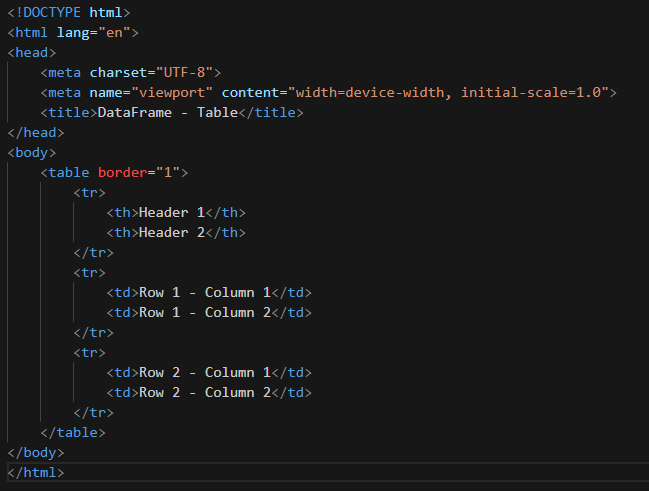
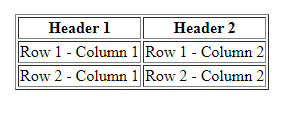

```css
<table></table> --> beginning and end of table
<tr></tr> --> start-end of table row
<th></th> --> start-end of table header
<td></td> --> start and end of table columns

For example, a table;
<table>
<tr><th>Heading 1</th><th>Heading 2</th></tr>
<tr><td>Column 1</td><td>Column 2</td></tr>
</table>
```


See that the tags are nested here and the table contains the TRs.

tr's also contain th's or td's depending on whether they are titles or values.

There are many resources about HTML and more up-to-date information can be easily accessed on the internet.